<a href="https://colab.research.google.com/github/SahilK-027/Random-Forest-Regression/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.preprocessing import scale
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from numpy import sqrt 
from sklearn.svm import SVR
import statistics

In [ ]:
df=pd.read_csv("/content/MPA_2013_Tara.xlsx - Data (1).csv")

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 1154,Unnamed: 1155,Unnamed: 1156,Unnamed: 1157,Unnamed: 1158,Unnamed: 1159,Unnamed: 1160,Unnamed: 1161,Unnamed: 1162,Unnamed: 1163
0,Sample,Rupture force,Distance at rup,Average firmnes,Toughness,Penetrating for,Penetrating ene,L,a,b,...,3664.300000,3656.585000,3648.871000,3641.157000,3633.442000,3625.728000,3618.014000,3610.300000,3602.585000,3594.871000
1,1 1,30.073,3.596,8.393,52.882,17.755,266.302,27.93,-7.7,13.25,...,1.459005,1.459935,1.461511,1.464244,1.466891,1.465683,1.462156,1.465600,1.466163,1.457214
2,1 2,27.357,3.52,7.892,49.93,19.336,290.025,34.27,-10.14,20.3,...,1.497129,1.495515,1.498196,1.499682,1.500382,1.502921,1.502185,1.496817,1.494850,1.496570
3,2 1,30.534,4.243,7.287,61.572,16.461,246.897,37.74,-10.76,24.83,...,1.488554,1.487360,1.485779,1.486947,1.488858,1.490618,1.494373,1.501494,1.515716,1.528029
4,2 2,31.099,3.284,9.552,51.26,17.244,258.649,34.51,-9.18,16.21,...,1.481927,1.481738,1.482066,1.487423,1.498295,1.511110,1.515386,1.495400,1.476609,1.484268


In [ ]:
df=df.drop(0)

In [ ]:
df.describe()

,Wavelength (nm),Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,...,Unnamed: 1154,Unnamed: 1155,Unnamed: 1156,Unnamed: 1157,Unnamed: 1158,Unnamed: 1159,Unnamed: 1160,Unnamed: 1161,Unnamed: 1162,Unnamed: 1163
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,...,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.088701,0.088924,0.089088,0.089055,0.088894,0.088670,0.088404,0.088367,0.088550,0.088490,...,1.459327,1.459999,1.464924,1.467442,1.468288,1.471624,1.475874,1.475752,1.473261,1.471518
std,0.026523,0.026624,0.026493,0.026302,0.026227,0.026277,0.026396,0.026465,0.026437,0.026422,...,0.041756,0.041815,0.042730,0.043046,0.043167,0.044396,0.046358,0.046424,0.045121,0.044849
min,0.034163,0.034166,0.035013,0.034996,0.034376,0.034216,0.033890,0.033290,0.033052,0.033168,...,1.314594,1.313717,1.314475,1.313547,1.319450,1.334030,1.341354,1.335926,1.331882,1.336516
25%,0.071027,0.071069,0.072049,0.072449,0.071869,0.071543,0.071209,0.071138,0.071858,0.072027,...,1.431057,1.432698,1.441333,1.440939,1.441637,1.442038,1.444541,1.446567,1.445731,1.441553
50%,0.083981,0.084309,0.084750,0.085168,0.084754,0.084495,0.084570,0.084645,0.085219,0.085312,...,1.458639,1.458723,1.462651,1.464730,1.466993,1.467408,1.474462,1.475790,1.474014,1.471403
75%,0.099511,0.099859,0.100151,0.099687,0.099381,0.099646,0.099508,0.099292,0.099289,0.098356,...,1.483515,1.485418,1.491891,1.495426,1.497623,1.500071,1.503893,1.504621,1.502215,1.502363
max,0.181502,0.182234,0.181904,0.180731,0.180089,0.180025,0.179972,0.180295,0.180789,0.180674,...,1.579230,1.577747,1.587306,1.603964,1.625060,1.644387,1.638668,1.607043,1.607173,1.592038


In [ ]:
df.drop(['Unnamed: 0'], axis = 1,inplace=True)
df=df.fillna("0")
df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Wavelength (nm),...,Unnamed: 1154,Unnamed: 1155,Unnamed: 1156,Unnamed: 1157,Unnamed: 1158,Unnamed: 1159,Unnamed: 1160,Unnamed: 1161,Unnamed: 1162,Unnamed: 1163
1,30.073,3.596,8.393,52.882,17.755,266.302,27.93,-7.7,13.25,0.088624,...,1.459005,1.459935,1.461511,1.464244,1.466891,1.465683,1.462156,1.4656,1.466163,1.457214
2,27.357,3.52,7.892,49.93,19.336,290.025,34.27,-10.14,20.3,0.074259,...,1.497129,1.495515,1.498196,1.499682,1.500382,1.502921,1.502185,1.496817,1.49485,1.49657
3,30.534,4.243,7.287,61.572,16.461,246.897,37.74,-10.76,24.83,0.080869,...,1.488554,1.48736,1.485779,1.486947,1.488858,1.490618,1.494373,1.501494,1.515716,1.528029
4,31.099,3.284,9.552,51.26,17.244,258.649,34.51,-9.18,16.21,0.089407,...,1.481927,1.481738,1.482066,1.487423,1.498295,1.51111,1.515386,1.4954,1.476609,1.484268
5,32.656,3.413,9.625,60.907,17.322,259.822,30.58,-7.76,12.83,0.097636,...,1.470639,1.469211,1.467662,1.469216,1.474816,1.479691,1.475909,1.467849,1.466183,1.463325


In [ ]:
df.columns

Index(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Wavelength (nm)',
       ...
       'Unnamed: 1154', 'Unnamed: 1155', 'Unnamed: 1156', 'Unnamed: 1157',
       'Unnamed: 1158', 'Unnamed: 1159', 'Unnamed: 1160', 'Unnamed: 1161',
       'Unnamed: 1162', 'Unnamed: 1163'],
      dtype='object', length=1163)

In [ ]:
df.describe()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Wavelength (nm),...,Unnamed: 1154,Unnamed: 1155,Unnamed: 1156,Unnamed: 1157,Unnamed: 1158,Unnamed: 1159,Unnamed: 1160,Unnamed: 1161,Unnamed: 1162,Unnamed: 1163
count,203,203,203,203,203,203,203,203,203,203.000000,...,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.0000,203.000000,203.000000
unique,202,200,201,203,197,201,180,161,185,203.000000,...,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,202.000000,203.0000,202.000000,203.000000
top,30.713,3.133,6.679,52.882,0,0,30.31,-7.1,10.61,0.088624,...,1.459005,1.459935,1.461511,1.464244,1.466891,1.465683,1.452984,1.4656,1.491042,1.457214
freq,2,2,2,1,3,3,3,3,2,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.0000,2.000000,1.000000


In [ ]:
df.info

<bound method DataFrame.info of     Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  \
1       30.073      3.596      8.393     52.882     17.755    266.302   
2       27.357       3.52      7.892      49.93     19.336    290.025   
3       30.534      4.243      7.287     61.572     16.461    246.897   
4       31.099      3.284      9.552      51.26     17.244    258.649   
5       32.656      3.413      9.625     60.907     17.322    259.822   
..         ...        ...        ...        ...        ...        ...   
199      30.29      2.933     10.475     45.665     18.489    277.323   
200     29.955      2.884     10.442     44.436     18.049    270.723   
201     24.637      3.594      6.899     44.449     16.423    246.325   
202      27.72      2.266     12.272     34.333     15.555    233.314   
203      8.314      3.849      2.146     19.574      0.831     12.467   

    Unnamed: 7 Unnamed: 8 Unnamed: 9 Wavelength (nm)  ... Unnamed: 1154  \
1        27.93  

# **RANDOM FOREST REGRESSOR**

# **Results for test data**

R_Squared value for test data: 0.8910277502690623
Bias: -0.0023825609756329413
Mean Squared Error: 4.408132056693263
Root Mean Squared Error: 2.0995552044881465
Mean Absolute Error: 1.462170853658527
Ratio of performance to deviation RPD_pred: 2.2519217157022444

     Real Values  Predicted Values
0        27.476         27.958055
1        29.046         28.875680
2        31.211         28.493090
3        29.108         30.006220
4        35.627         33.944860
5        30.713         29.827845
6        32.448         28.989690
7        26.425         28.038840
8        26.548         27.627280
9        29.322         29.808100
10       31.082         30.757435
11       21.106         23.379630
12       19.579         21.686095
13       23.973         26.354330
14       31.744         30.603245
15       30.713         30.658520
16       30.636         29.052330
17       32.203         30.768790
18       31.222         30.599815
19       33.160         32.259570
20       32.673      

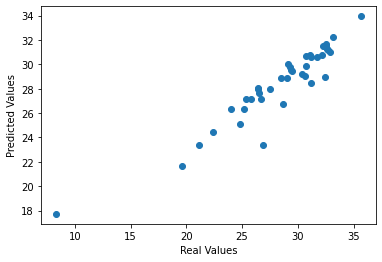

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 1"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_test, y_test)
y_pred = regressor.predict(X_test)
y_test_new = np.array(y_test)
y_test_new= y_test_new.astype(float)
correlation = np.corrcoef(y_test_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_test_new.mean()-y_pred.mean()
mse = mean_squared_error(y_test_new,y_pred)
rmse = sqrt(mse)
ANA = pd.DataFrame({'Real Values':y_test_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_test_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.9613286803711986
Bias: 0.004964390243903161
Mean Squared Error: 0.041735056175610075
Root Mean Squared Error: 0.2042915959495399
Mean Absolute Error: 0.1580443902439031
Ratio of performance to deviation RPD_pred: 3.540761851069193

     Real Values  Predicted Values
0         3.419          3.555880
1         3.401          3.338490
2         3.644          3.574555
3         3.037          3.154915
4         3.494          3.571110
5         4.828          4.296340
6         3.525          3.425085
7         3.183          3.345965
8         2.597          2.932560
9         3.301          3.263340
10        4.322          3.934400
11        3.804          3.591430
12        2.137          2.712090
13        3.469          3.456505
14        3.686          3.600690
15        3.855          3.796390
16        3.531          3.403935
17        3.697          3.672535
18        3.245          3.293770
19        4.151          3.843305
20        3.319     

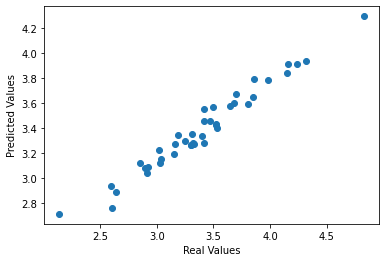

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 2"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_test, y_test)
y_pred = regressor.predict(X_test)
y_test_new = np.array(y_test)
y_test_new= y_test_new.astype(float)
correlation = np.corrcoef(y_test_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_test_new.mean()-y_pred.mean()
mse = mean_squared_error(y_test_new,y_pred)
rmse = sqrt(mse)
ANA = pd.DataFrame({'Real Values':y_test_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_test_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.9241977771747274
Bias: 0.03409817073170984
Mean Squared Error: 0.538414088911591
Root Mean Squared Error: 0.733767053574628
Mean Absolute Error: 0.5213050000000039
Ratio of performance to deviation RPD_pred: 2.6622355693694515

     Real Values  Predicted Values
0         8.169          8.106485
1         8.680          8.880145
2         8.772          8.498195
3         9.570          9.475960
4        10.272          9.630510
5         6.519          7.402125
6         9.276          8.374825
7         8.398          8.395175
8        10.301          9.702360
9         8.976          8.984845
10        7.195          7.678530
11        5.585          6.668960
12        9.296          8.480975
13        7.048          7.663465
14        8.776          8.588425
15        8.062          8.180750
16        8.740          8.931410
17        8.855          8.450660
18        9.714          9.254165
19        8.024          8.289285
20        9.953         

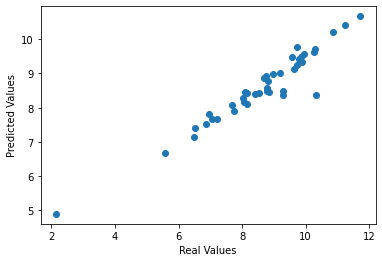

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 3"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_test, y_test)
y_pred = regressor.predict(X_test)
y_test_new = np.array(y_test)
y_test_new= y_test_new.astype(float)
correlation = np.corrcoef(y_test_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_test_new.mean()-y_pred.mean()
mse = mean_squared_error(y_test_new,y_pred)
rmse = sqrt(mse)
ANA = pd.DataFrame({'Real Values':y_test_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_test_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.9097695281202489
Bias: -0.03358670731709168
Mean Squared Error: 20.572876965782257
Root Mean Squared Error: 4.535733343769479
Mean Absolute Error: 3.524320853658549
Ratio of performance to deviation RPD_pred: 2.986781582113824

     Real Values  Predicted Values
0        48.226         49.763645
1        48.479         48.294660
2        57.812         54.223320
3        47.770         50.143455
4        63.661         61.006215
5        68.428         63.205735
6        58.887         50.231245
7        42.423         47.485875
8        40.302         45.140475
9        52.802         53.168630
10       60.091         56.836560
11       41.799         44.138125
12       22.089         31.233945
13       37.360         43.163340
14       55.728         52.983540
15       59.624         58.967285
16       57.444         50.661455
17       59.790         57.644565
18       51.960         51.369355
19       69.493         63.398340
20       53.162         

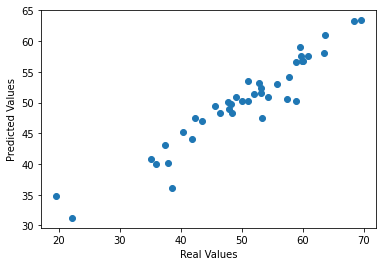

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 4"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_test, y_test)
y_pred = regressor.predict(X_test)
y_test_new = np.array(y_test)
y_test_new= y_test_new.astype(float)
correlation = np.corrcoef(y_test_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_test_new.mean()-y_pred.mean()
mse = mean_squared_error(y_test_new,y_pred)
rmse = sqrt(mse)
ANA = pd.DataFrame({'Real Values':y_test_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_test_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.8678834130865314
Bias: 0.0825337804877968
Mean Squared Error: 2.0368883050201196
Root Mean Squared Error: 1.427195958871843
Mean Absolute Error: 0.8111830487804846
Ratio of performance to deviation RPD_pred: 2.508682599226

     Real Values  Predicted Values
0        14.417         15.576440
1        18.647         18.226195
2        19.644         17.348870
3        16.728         17.128930
4        18.092         18.178460
5        17.328         16.930120
6        15.248         14.467725
7        18.937         18.364540
8        17.853         17.657285
9        18.186         17.428920
10       19.818         19.313695
11       15.215         15.902750
12       13.800         13.828870
13       15.840         16.925550
14       17.906         17.778100
15       17.649         17.695195
16       19.297         18.682350
17       19.617         18.648515
18       17.259         17.570160
19       19.194         18.684285
20       18.827         17.8

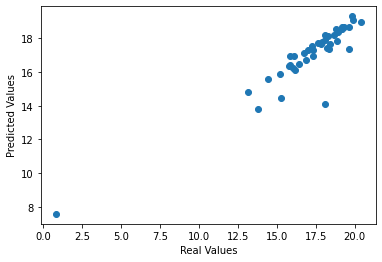

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 5"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_test, y_test)
y_pred = regressor.predict(X_test)
y_test_new = np.array(y_test)
y_test_new= y_test_new.astype(float)
correlation = np.corrcoef(y_test_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_test_new.mean()-y_pred.mean()
mse = mean_squared_error(y_test_new,y_pred)
rmse = sqrt(mse)
ANA = pd.DataFrame({'Real Values':y_test_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_test_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.868384319059916
Bias: 1.1953865853657817
Mean Squared Error: 458.5304278519427
Root Mean Squared Error: 21.413323605922148
Mean Absolute Error: 12.087555853658444
Ratio of performance to deviation RPD_pred: 2.507876357212649

     Real Values  Predicted Values
0       216.255        233.048135
1       279.694        273.164315
2       294.642        259.452490
3       250.893        256.986550
4       271.365        272.699040
5       259.911        254.210270
6       228.713        217.612370
7       284.030        275.660835
8       267.773        264.666410
9       272.773        262.508240
10      297.244        289.973630
11      228.207        238.365490
12      206.983        207.366510
13      237.589        253.712650
14      268.567        266.270485
15      264.718        265.802635
16      289.438        280.872395
17      294.240        279.493055
18      258.873        262.923025
19      287.883        280.764230
20      282.384        268

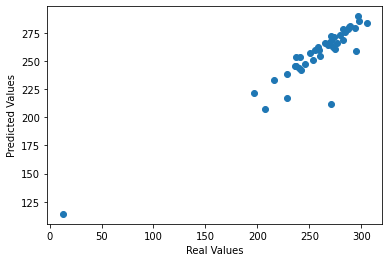

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 6"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_test, y_test)
y_pred = regressor.predict(X_test)
y_test_new = np.array(y_test)
y_test_new= y_test_new.astype(float)
correlation = np.corrcoef(y_test_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_test_new.mean()-y_pred.mean()
mse = mean_squared_error(y_test_new,y_pred)
rmse = sqrt(mse)
ANA = pd.DataFrame({'Real Values':y_test_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_test_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.9381237500195347
Bias: 0.007721951219512135
Mean Squared Error: 2.21122542195124
Root Mean Squared Error: 1.4870189716177935
Mean Absolute Error: 1.009163414634151
Ratio of performance to deviation RPD_pred: 2.5707689625066403

     Real Values  Predicted Values
0         33.25          32.90200
1         30.26          30.07060
2         35.59          34.23735
3         30.31          29.90145
4         28.02          28.91470
5         31.70          31.91840
6         31.62          32.48075
7         30.08          30.52850
8         29.13          29.55695
9         23.02          25.69515
10        28.89          29.04365
11        31.18          30.74180
12        41.23          37.22180
13        34.28          32.59955
14        31.18          30.92085
15        30.67          30.56970
16        27.35          27.24205
17        30.95          31.45810
18        30.16          30.46170
19        34.80          32.51510
20        30.26         

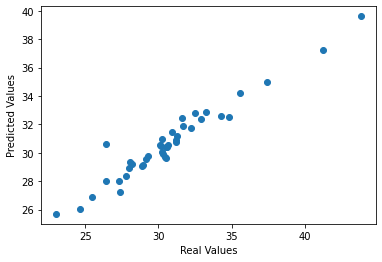

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 7"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_test, y_test)
y_pred = regressor.predict(X_test)
y_test_new = np.array(y_test)
y_test_new= y_test_new.astype(float)
correlation = np.corrcoef(y_test_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_test_new.mean()-y_pred.mean()
mse = mean_squared_error(y_test_new,y_pred)
rmse = sqrt(mse)
ANA = pd.DataFrame({'Real Values':y_test_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_test_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.8743410709911604
Bias: -0.0672012195121976
Mean Squared Error: 0.9573982111585367
Root Mean Squared Error: 0.9784672764883539
Mean Absolute Error: 0.567601219512197
Ratio of performance to deviation RPD_pred: 1.4975473828610464

     Real Values  Predicted Values
0        -12.12         -10.49805
1         -8.51          -7.94020
2         -9.13          -7.53975
3         -7.59          -7.74190
4         -6.96          -7.37465
5         -7.30          -7.46230
6         -8.90          -7.51005
7         -6.25          -6.83115
8         -7.70          -7.58935
9         -6.46          -6.91915
10        -9.25          -8.60070
11        -7.03          -7.19445
12        -7.82          -6.65315
13        -8.54          -8.27635
14        -7.22          -7.39525
15        -8.83          -8.40230
16        -6.52          -7.09910
17        -7.19          -7.49245
18        -7.52          -7.73190
19        -9.02          -8.48895
20        -6.93        

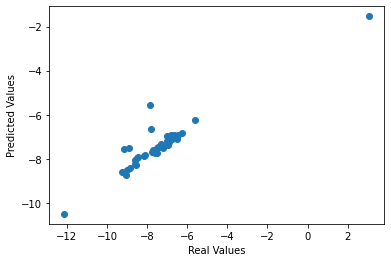

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 8"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_test, y_test)
y_pred = regressor.predict(X_test)
y_test_new = np.array(y_test)
y_test_new= y_test_new.astype(float)
correlation = np.corrcoef(y_test_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_test_new.mean()-y_pred.mean()
mse = mean_squared_error(y_test_new,y_pred)
rmse = sqrt(mse)
ANA = pd.DataFrame({'Real Values':y_test_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_test_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.9165814284127852
Bias: 0.14311463414634673
Mean Squared Error: 3.200058570853652
Root Mean Squared Error: 1.7888707529762042
Mean Absolute Error: 1.2269024390243901
Ratio of performance to deviation RPD_pred: 2.304290225225355

     Real Values  Predicted Values
0         21.29          18.40480
1         11.67          11.38860
2         16.65          16.89720
3         12.13          12.50040
4         12.18          12.26655
5         12.34          13.22170
6         11.36          13.85905
7          9.33          10.67620
8         14.50          13.67850
9          9.64          10.77015
10        14.67          13.90220
11        16.12          15.08520
12        27.69          21.60560
13        19.46          16.12180
14        12.02          11.71040
15        15.29          14.24240
16         7.18          10.30065
17        13.29          13.95855
18        11.36          11.83580
19        15.15          13.97990
20        10.81         

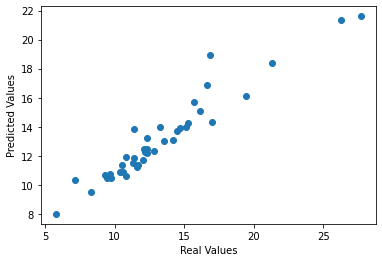

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 9"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_test, y_test)
y_pred = regressor.predict(X_test)
y_test_new = np.array(y_test)
y_test_new= y_test_new.astype(float)
correlation = np.corrcoef(y_test_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_test_new.mean()-y_pred.mean()
mse = mean_squared_error(y_test_new,y_pred)
rmse = sqrt(mse)
ANA = pd.DataFrame({'Real Values':y_test_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_test_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

# **Results on training data**

R_Squared value for test data: 0.9345938003379157
Bias: -0.0018607407407458254
Mean Squared Error: 3.229417286131169
Root Mean Squared Error: 1.7970579529139201
Mean Absolute Error: 1.2724190123456767
Ratio of performance to deviation RPD_pred: 2.630985801340486

      Real Values  Predicted Values
0         24.289         25.674465
1         29.204         28.355985
2         27.156         28.067660
3         34.794         32.957340
4         29.544         28.039625
..           ...               ...
157       27.886         28.300495
158       28.712         28.991055
159       25.648         26.280685
160       29.712         29.266960
161       24.437         23.080690

[162 rows x 2 columns]


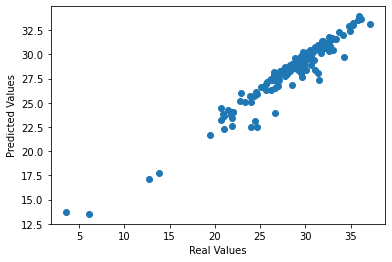

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 1"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)
y_train_new = np.array(y_train)
y_train_new= y_train_new.astype(float)
correlation = np.corrcoef(y_train_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_train_new.mean()-y_pred.mean()
mse = mean_squared_error(y_train_new,y_pred)
rmse = sqrt(mse)
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
ANA = pd.DataFrame({'Real Values':y_train_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_train_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.9503901763210333
Bias: -0.016242345679013948
Mean Squared Error: 0.09032074061049362
Root Mean Squared Error: 0.30053409225991917
Mean Absolute Error: 0.214732592592592
Ratio of performance to deviation RPD_pred: 2.406874654362274

      Real Values  Predicted Values
0          3.466          3.442445
1          3.267          3.259085
2          3.898          3.901950
3          3.415          3.479190
4          2.378          2.735210
..           ...               ...
157        3.074          3.123020
158        4.340          4.691040
159        3.214          3.271240
160        3.043          3.053090
161        2.716          2.903085

[162 rows x 2 columns]


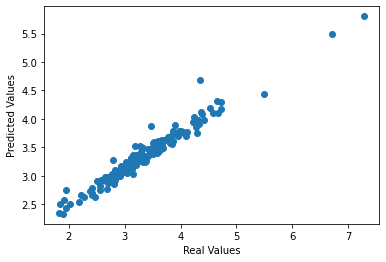

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 2"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)
y_train_new = np.array(y_train)
y_train_new= y_train_new.astype(float)
correlation = np.corrcoef(y_train_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_train_new.mean()-y_pred.mean()
mse = mean_squared_error(y_train_new,y_pred)
rmse = sqrt(mse)
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
ANA = pd.DataFrame({'Real Values':y_train_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_train_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.964782182645394
Bias: 0.013994845679013324
Mean Squared Error: 0.5928582206933674
Root Mean Squared Error: 0.7699728701021662
Mean Absolute Error: 0.5801507716049417
Ratio of performance to deviation RPD_pred: 2.53705140208199

      Real Values  Predicted Values
0          7.126          7.648550
1          8.985          8.791265
2          7.088          7.441650
3         10.262          9.548990
4         12.467         10.940985
..           ...               ...
157        9.210          8.911730
158        6.679          7.383435
159        8.124          8.228285
160        9.889          9.535210
161        9.156          8.496585

[162 rows x 2 columns]


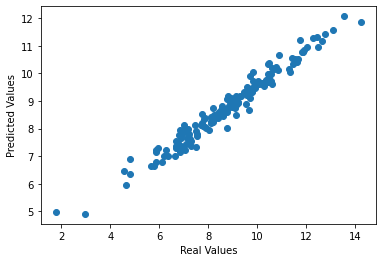

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 3"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)
y_train_new = np.array(y_train)
y_train_new= y_train_new.astype(float)
correlation = np.corrcoef(y_train_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_train_new.mean()-y_pred.mean()
mse = mean_squared_error(y_train_new,y_pred)
rmse = sqrt(mse)
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
ANA = pd.DataFrame({'Real Values':y_train_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_train_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.9379604986180574
Bias: -0.24317169753086176
Mean Squared Error: 29.381517169356403
Root Mean Squared Error: 5.420472043037987
Mean Absolute Error: 3.842389413580255
Ratio of performance to deviation RPD_pred: 2.4992739940334547

      Real Values  Predicted Values
0         40.936         44.604445
1         50.317         48.562865
2         54.285         53.857345
3         61.020         58.266310
4         38.245         41.925095
..           ...               ...
157       46.191         47.673685
158       58.558         69.804915
159       40.149         43.776820
160       46.047         46.036370
161       34.621         36.442725

[162 rows x 2 columns]


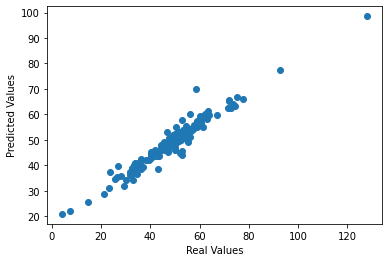

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 4"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)
y_train_new = np.array(y_train)
y_train_new= y_train_new.astype(float)
correlation = np.corrcoef(y_train_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_train_new.mean()-y_pred.mean()
mse = mean_squared_error(y_train_new,y_pred)
rmse = sqrt(mse)
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
ANA = pd.DataFrame({'Real Values':y_train_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_train_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.9009757322639841
Bias: 0.021771635802476652
Mean Squared Error: 2.4971338695220755
Root Mean Squared Error: 1.5802322201252812
Mean Absolute Error: 0.9547801543209931
Ratio of performance to deviation RPD_pred: 2.2657313413237485

      Real Values  Predicted Values
0         17.493         17.520810
1         16.491         16.709360
2         15.138         15.767570
3         20.210         19.369580
4         16.485         16.813255
..           ...               ...
157       18.537         18.160470
158       20.686         15.732490
159       18.614         18.239330
160       18.644         17.843250
161       10.989         11.524045

[162 rows x 2 columns]


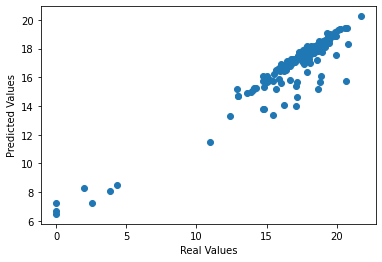

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 5"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)
y_train_new = np.array(y_train)
y_train_new= y_train_new.astype(float)
correlation = np.corrcoef(y_train_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_train_new.mean()-y_pred.mean()
mse = mean_squared_error(y_train_new,y_pred)
rmse = sqrt(mse)
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
ANA = pd.DataFrame({'Real Values':y_train_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_train_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.9011462820688018
Bias: 0.28453435185170406
Mean Squared Error: 562.0242157326311
Root Mean Squared Error: 23.707049916272396
Mean Absolute Error: 14.25260132716042
Ratio of performance to deviation RPD_pred: 2.265231995980019

      Real Values  Predicted Values
0        262.377        262.929400
1        247.339        250.306795
2        227.049        234.224455
3        303.133        290.808535
4        247.257        252.719100
..           ...               ...
157      278.036        271.076640
158      310.266        237.547985
159      279.189        273.514845
160      279.641        267.817675
161      164.827        168.387150

[162 rows x 2 columns]


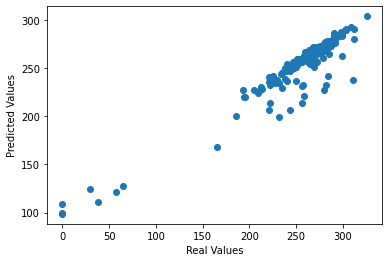

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 6"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)
y_train_new = np.array(y_train)
y_train_new= y_train_new.astype(float)
correlation = np.corrcoef(y_train_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_train_new.mean()-y_pred.mean()
mse = mean_squared_error(y_train_new,y_pred)
rmse = sqrt(mse)
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
ANA = pd.DataFrame({'Real Values':y_train_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_train_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.9299554058742446
Bias: 0.027697839506167554
Mean Squared Error: 1.7989310017746951
Root Mean Squared Error: 1.341242335215637
Mean Absolute Error: 1.003304012345682
Ratio of performance to deviation RPD_pred: 2.850180104312739

      Real Values  Predicted Values
0          26.43          27.76630
1          26.67          27.74940
2          36.35          34.03690
3          28.88          30.12080
4          29.23          29.49735
..           ...               ...
157        39.14          37.43585
158        30.28          29.60410
159        27.21          28.09715
160        27.22          28.32860
161        39.54          37.12025

[162 rows x 2 columns]


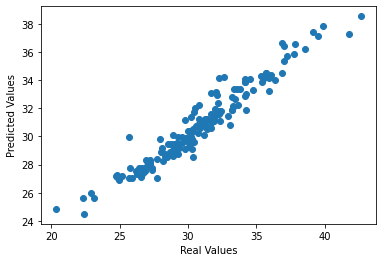

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 7"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)
y_train_new = np.array(y_train)
y_train_new= y_train_new.astype(float)
correlation = np.corrcoef(y_train_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_train_new.mean()-y_pred.mean()
mse = mean_squared_error(y_train_new,y_pred)
rmse = sqrt(mse)
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
ANA = pd.DataFrame({'Real Values':y_train_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_train_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.9428663258535129
Bias: -0.0062626543209853835
Mean Squared Error: 0.24813801476851705
Root Mean Squared Error: 0.49813453480813497
Mean Absolute Error: 0.32999969135802515
Ratio of performance to deviation RPD_pred: 2.941577037385484

      Real Values  Predicted Values
0          -6.26          -6.61520
1          -6.82          -7.00695
2          -8.35          -7.93305
3          -6.26          -6.96275
4          -6.74          -7.08540
..           ...               ...
157       -10.55          -9.52070
158        -9.93          -9.23630
159        -6.64          -6.76145
160        -6.70          -6.85995
161        -2.81          -4.26615

[162 rows x 2 columns]


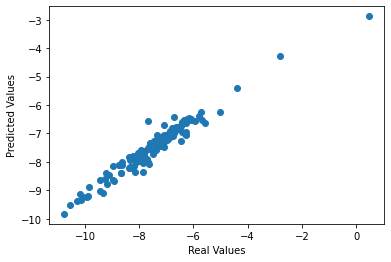

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 8"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)
y_train_new = np.array(y_train)
y_train_new= y_train_new.astype(float)
correlation = np.corrcoef(y_train_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_train_new.mean()-y_pred.mean()
mse = mean_squared_error(y_train_new,y_pred)
rmse = sqrt(mse)
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
ANA = pd.DataFrame({'Real Values':y_train_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_train_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

R_Squared value for test data: 0.9314742399521843
Bias: 0.004339814814811049
Mean Squared Error: 2.1497014926388816
Root Mean Squared Error: 1.4661860361628334
Mean Absolute Error: 1.0141151234567878
Ratio of performance to deviation RPD_pred: 2.8114286240663624

      Real Values  Predicted Values
0           7.57           8.90725
1          12.09          12.10535
2          13.58          12.63585
3           9.09          11.56610
4           9.55          10.90050
..           ...               ...
157        23.22          20.06770
158        20.22          19.67350
159         8.63           9.42625
160        11.20          11.86395
161        20.66          17.53785

[162 rows x 2 columns]


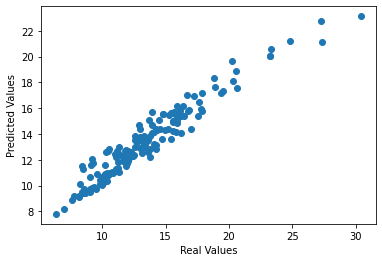

In [ ]:
X=df.iloc[:,10:1163]
y=df["Unnamed: 9"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)
y_train_new = np.array(y_train)
y_train_new= y_train_new.astype(float)
correlation = np.corrcoef(y_train_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_train_new.mean()-y_pred.mean()
mse = mean_squared_error(y_train_new,y_pred)
rmse = sqrt(mse)
y_new= np.array(y)
y_new= y_new.astype(float)
RPD_pred = statistics.stdev(y_new)/rmse
ANA = pd.DataFrame({'Real Values':y_train_new.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train_new, y_pred))
print('Ratio of performance to deviation RPD_pred:',RPD_pred)
print("\n",ANA)
plt.scatter(y_train_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

# **PLSR**

/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:93: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:325: RuntimeWarning: invalid value encountered in true_divide
  x_loadings = np.dot(x_scores, Xk) / np.dot(x_scores, x_scores)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:334: RuntimeWarning: invalid value encountered in true_divide
  y_loadings = np.dot(x_scores, Yk) / np.dot(x_scores, x_scores)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  Fi

R_Squared value for test data: nan
Bias: 0.6768565649731375
Mean Squared Error: 4.471111124179052
Root Mean Squared Error: 2.1145002067105723
Mean Absolute Error: 1.673131077052186


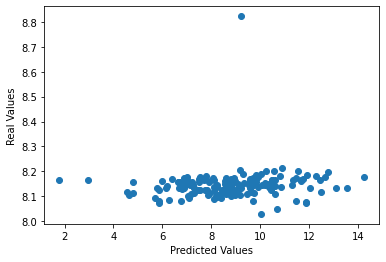

In [ ]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import RepeatedKFold
from sklearn import model_selection
X = df.iloc[:,11:1146].values
y=df.iloc[:, 2:3].values

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) #cross validation estimate 
mse = []
n = len(X)
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)
for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
sc= StandardScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y)
pls = PLSRegression(n_components=3)
pls.fit(scale(X_train), y_train)
y_train_new = np.array(y_train)
y_train_new= y_train_new.astype(float)
y_pred = pls.predict(X_train)
correlation = np.corrcoef(y_train_new,y_pred)[0,1]
r2_score=correlation**2
bias=y_train_new.mean()-y_pred.mean()
mse = mean_squared_error(y_train_new,y_pred)
rmse = sqrt(mse)
y_new= np.array(y)
y_new= y_new.astype(float)
print('R_Squared value for test data:',r2_score)
print('Bias:',bias)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train_new, y_pred))
plt.scatter(y_train_new.reshape(-1), y_pred.reshape(-1))
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.show()